In [3]:
import numpy as np  
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os


data = []

for dirpath, dirnames, filenames in os.walk('data\\'):
    for filename in filenames:
        data.append(os.path.join('data', filename))

data

['data\\gender_submission.csv', 'data\\test.csv', 'data\\train.csv']

In [5]:
gender_submission_path, test_path, train_path = data


train = pd.read_csv(train_path)

test = pd.read_csv(test_path)


train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: title={'center': 'Histogram of ages'}, ylabel='Age'>

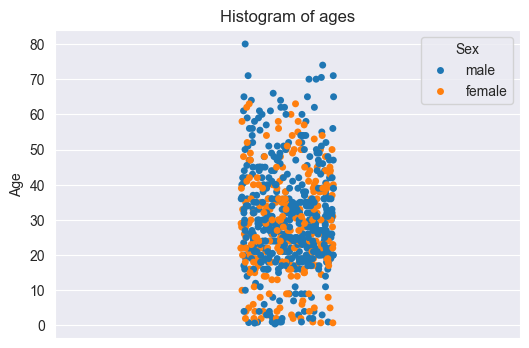

In [28]:
sns.set_style('darkgrid')

plt.figure(figsize=(6,4))
plt.title('Histogram of ages')

sns.stripplot(hue='Sex', y='Age', data=train)

<Axes: xlabel='Age', ylabel='Count'>

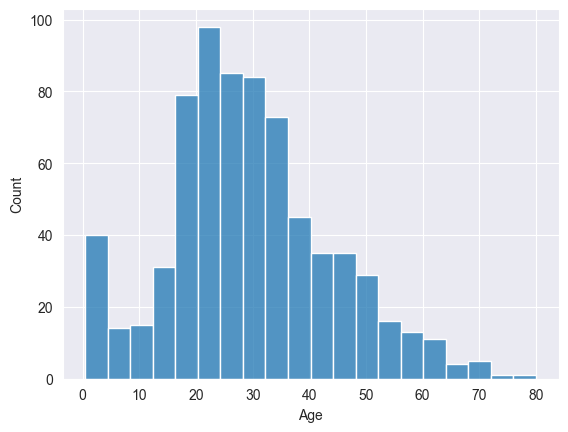

In [34]:
sns.histplot(x='Age', data=train)

<Axes: >

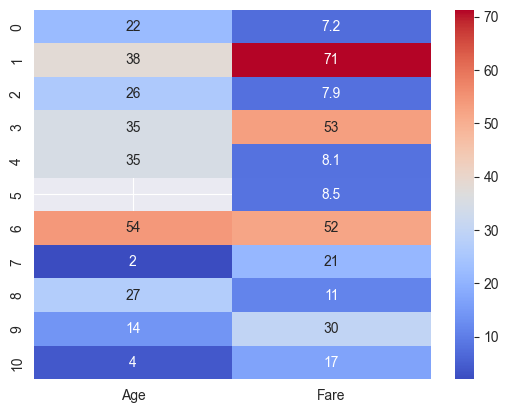

In [48]:
sns.heatmap(data=train.loc[:10, ['Age', 'Fare']], cmap='coolwarm', annot=True)


#### Lets try to see if maybe its only about the male or female 

In [31]:
assumption = []

for sex, age in zip(train['Sex'], train['Age']):
    if age <= 20: assumption.append(1)
    else: assumption.append(0)

same = 0

for guess, real in zip(assumption, train['Survived']):
    if int(guess) == int(real):
        same += 1
        
same

534